**Run the following two cells before you begin.**

In [106]:
%autosave 10

Autosaving every 10 seconds


In [107]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [108]:
# Import the data set
df =pd.read_csv('cleaned_data.csv')

In [109]:
# Define the sigmoid function
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [110]:
feature_response = ['PAY_1','LIMIT_BAL','default payment next month']

In [111]:
# Create a train/test split
from sklearn.model_selection import train_test_split
X =  df[['PAY_1','LIMIT_BAL']]
y =  df["default payment next month"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [112]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [113]:
# Fit the logistic regression model on training data
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
# Make predictions using `.predict()`
y_pred = lr.predict(X_test)

In [115]:
# Find class probabilities using `.predict_proba()`
probabilities = lr.predict_proba(X_test)

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [116]:
# Add column of 1s to features
X_test['pred'] = np.ones(X_test.shape[0])
X_test['pred']

14306    1.0
2978     1.0
16641    1.0
18580    1.0
131      1.0
        ... 
18160    1.0
19779    1.0
6666     1.0
18990    1.0
23253    1.0
Name: pred, Length: 5333, dtype: float64

In [117]:
# Get coefficients and intercepts from trained model
coeff, intercept = lr.coef_, lr.intercept_
#[0][0]

In [118]:
# Manually calculate predicted probabilities
X_test['pred'] = X_test['pred']*intercept+X_test['PAY_1']*coeff[0][0]+X_test['LIMIT_BAL']*coeff[0][1]

In [119]:
X_test['pred']

14306   -1.089403
2978    -0.340438
16641   -1.361753
18580   -1.361753
131     -0.340438
           ...   
18160   -0.953227
19779   -0.340438
6666    -0.340438
18990   -1.566016
23253   -0.680877
Name: pred, Length: 5333, dtype: float64

In [120]:
X_test['pred'] = X_test['pred'].apply(sigmoid)

In [121]:
X_test['pred']

14306    0.251731
2978     0.415703
16641    0.203955
18580    0.203955
131      0.415703
           ...   
18160    0.278236
19779    0.415703
6666     0.415703
18990    0.172785
23253    0.336066
Name: pred, Length: 5333, dtype: float64

In [122]:
X_test.query('pred >= 0.5')

,PAY_1,LIMIT_BAL,pred


______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [123]:
# Manually calculate predicted classes
X_test['pred_class'] = np.where(X_test['pred'] >= 0.5, 1,0)
X_test.query('pred > 0.5')

,PAY_1,LIMIT_BAL,pred,pred_class


In [124]:
# Compare to scikit-learn's predicted classes


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [125]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
X_test = X_test.drop(columns=['pred','pred_class'])
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
y_pred_proba = lr.predict_proba(X_test)
pos_proba = y_pred_proba[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)


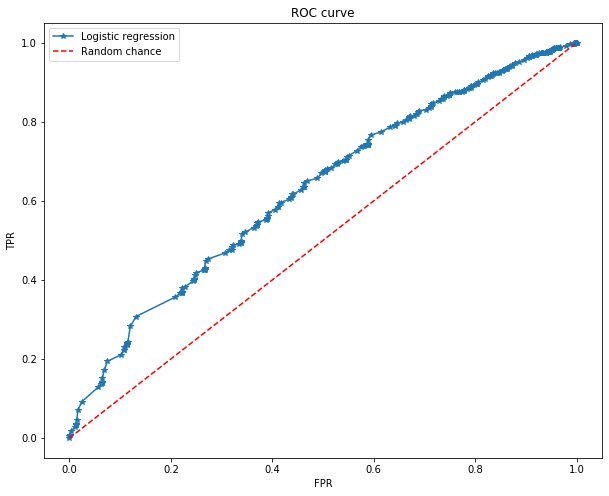

In [127]:
mpl.rcParams["figure.figsize"] = [10, 8]
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve');

In [128]:
metrics.roc_auc_score(y_test, pos_proba)

0.627207450280691

In [126]:
# Use manually calculated predicted probabilities to calculate ROC AUC
